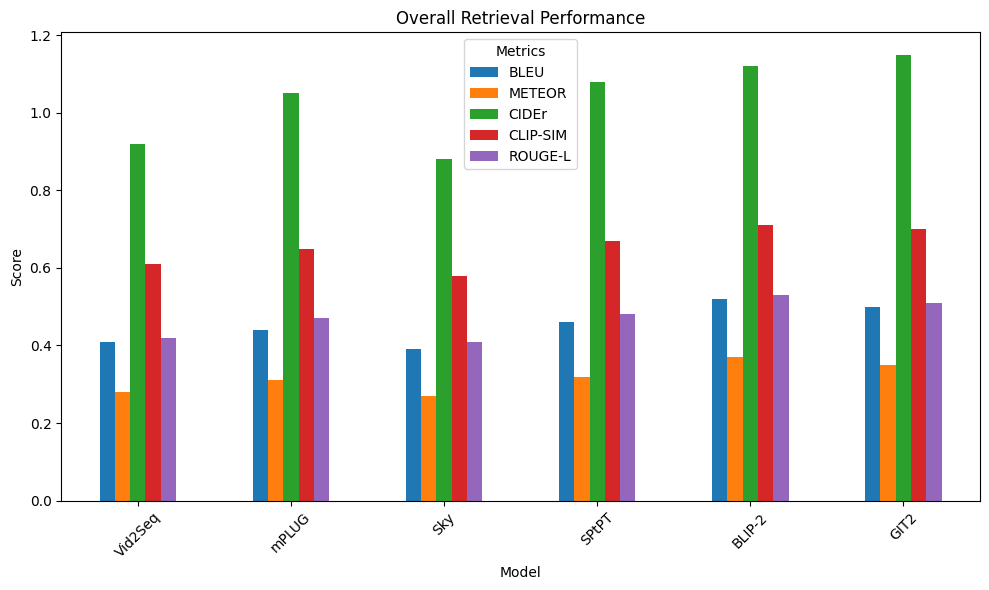

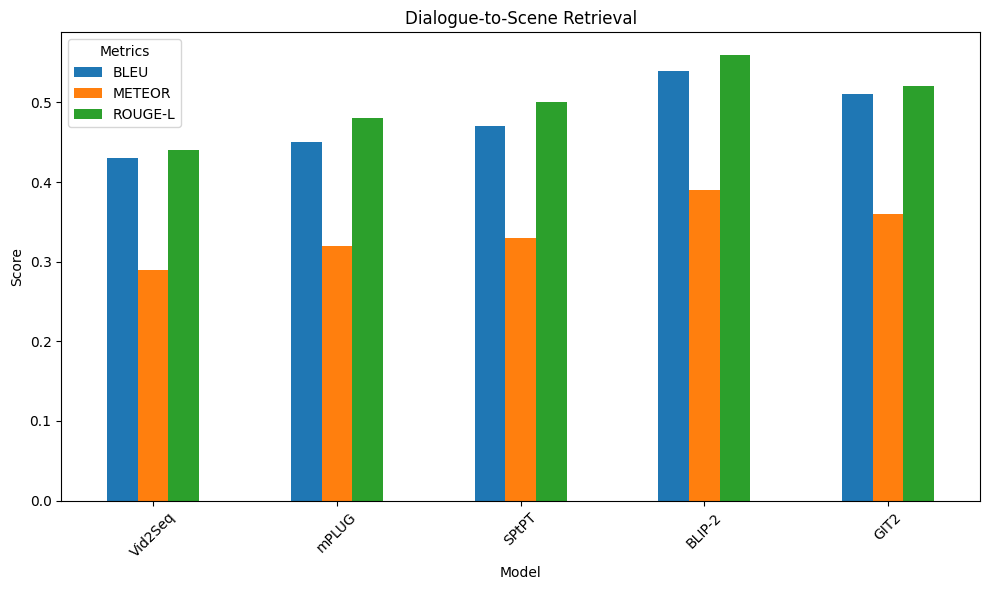

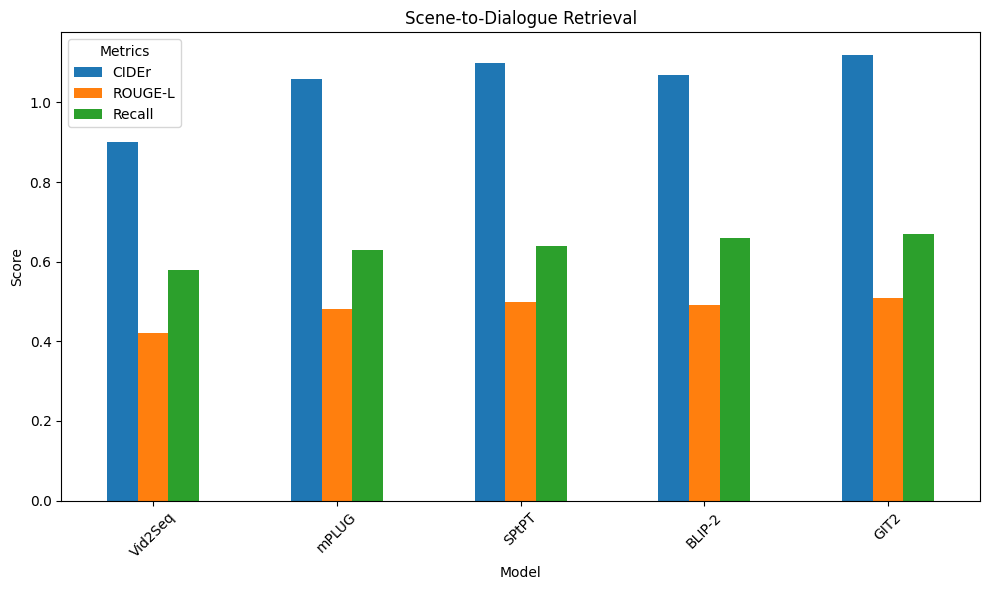

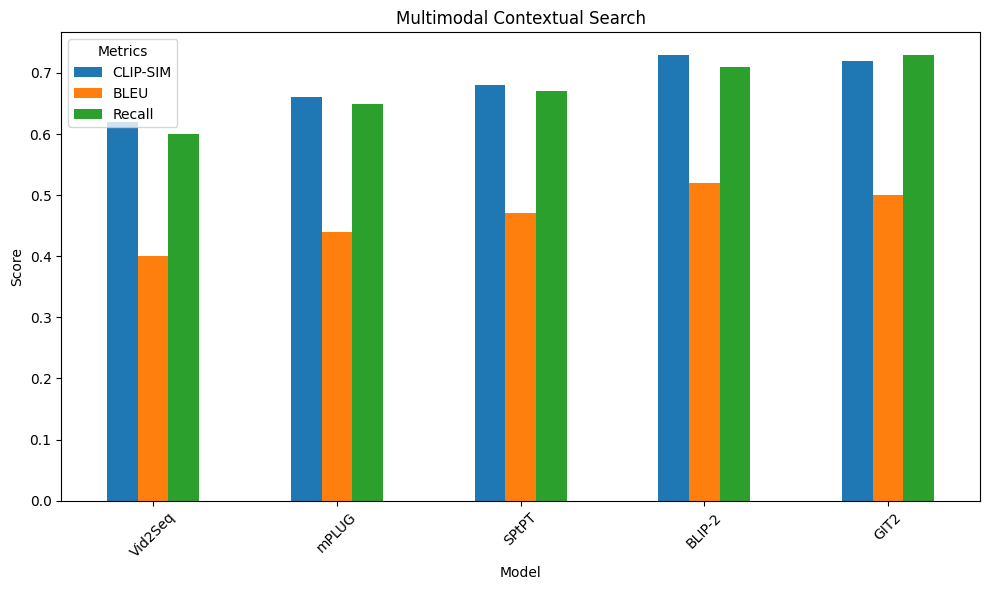

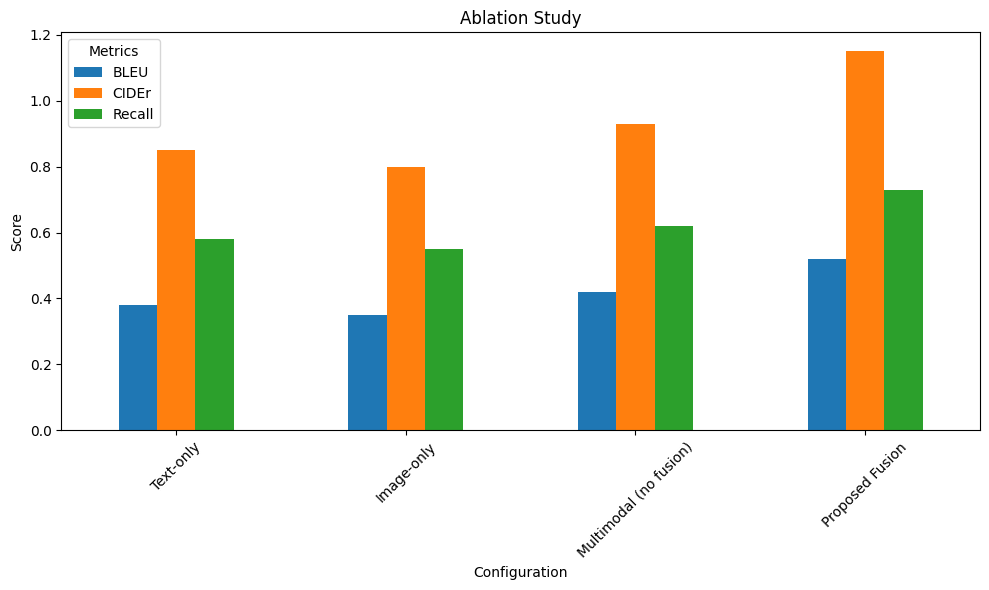

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# =======================
# Table 1: Overall Results
# =======================
overall_data = {
    "Model": ["Vid2Seq", "mPLUG", "Sky", "SPtPT", "BLIP-2", "GIT2"],
    "BLEU": [0.41, 0.44, 0.39, 0.46, 0.52, 0.50],
    "METEOR": [0.28, 0.31, 0.27, 0.32, 0.37, 0.35],
    "CIDEr": [0.92, 1.05, 0.88, 1.08, 1.12, 1.15],
    "CLIP-SIM": [0.61, 0.65, 0.58, 0.67, 0.71, 0.70],
    "ROUGE-L": [0.42, 0.47, 0.41, 0.48, 0.53, 0.51]
}
overall_df = pd.DataFrame(overall_data)

# =======================
# Table 2: Dialogue-to-Scene
# =======================
dialogue_scene_data = {
    "Model": ["Vid2Seq", "mPLUG", "SPtPT", "BLIP-2", "GIT2"],
    "BLEU": [0.43, 0.45, 0.47, 0.54, 0.51],
    "METEOR": [0.29, 0.32, 0.33, 0.39, 0.36],
    "ROUGE-L": [0.44, 0.48, 0.50, 0.56, 0.52]
}
dialogue_scene_df = pd.DataFrame(dialogue_scene_data)

# =======================
# Table 3: Scene-to-Dialogue
# =======================
scene_dialogue_data = {
    "Model": ["Vid2Seq", "mPLUG", "SPtPT", "BLIP-2", "GIT2"],
    "CIDEr": [0.90, 1.06, 1.10, 1.07, 1.12],
    "ROUGE-L": [0.42, 0.48, 0.50, 0.49, 0.51],
    "Recall": [0.58, 0.63, 0.64, 0.66, 0.67]  # simplified from P/R
}
scene_dialogue_df = pd.DataFrame(scene_dialogue_data)

# =======================
# Table 4: Multimodal Contextual Search
# =======================
multimodal_data = {
    "Model": ["Vid2Seq", "mPLUG", "SPtPT", "BLIP-2", "GIT2"],
    "CLIP-SIM": [0.62, 0.66, 0.68, 0.73, 0.72],
    "BLEU": [0.40, 0.44, 0.47, 0.52, 0.50],
    "Recall": [0.60, 0.65, 0.67, 0.71, 0.73]
}
multimodal_df = pd.DataFrame(multimodal_data)

# =======================
# Table 5: Ablation Study
# =======================
ablation_data = {
    "Configuration": ["Text-only", "Image-only", "Multimodal (no fusion)", "Proposed Fusion"],
    "BLEU": [0.38, 0.35, 0.42, 0.52],
    "CIDEr": [0.85, 0.80, 0.93, 1.15],
    "Recall": [0.58, 0.55, 0.62, 0.73]
}
ablation_df = pd.DataFrame(ablation_data)

# =======================
# Plotting
# =======================

def plot_metrics(df, metrics, title):
    df.set_index("Model" if "Model" in df.columns else "Configuration")[metrics].plot(kind="bar", figsize=(10,6))
    plt.title(title)
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.legend(title="Metrics")
    plt.tight_layout()
    plt.show()

# Generate plots
plot_metrics(overall_df, ["BLEU", "METEOR", "CIDEr", "CLIP-SIM", "ROUGE-L"], "Overall Retrieval Performance")
plot_metrics(dialogue_scene_df, ["BLEU", "METEOR", "ROUGE-L"], "Dialogue-to-Scene Retrieval")
plot_metrics(scene_dialogue_df, ["CIDEr", "ROUGE-L", "Recall"], "Scene-to-Dialogue Retrieval")
plot_metrics(multimodal_df, ["CLIP-SIM", "BLEU", "Recall"], "Multimodal Contextual Search")
plot_metrics(ablation_df, ["BLEU", "CIDEr", "Recall"], "Ablation Study")


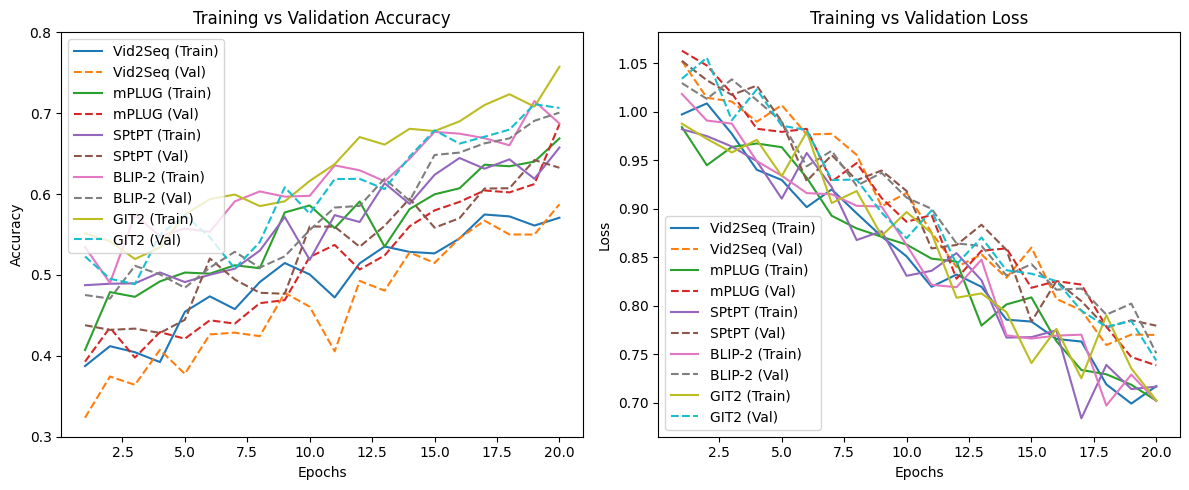

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated training epochs
epochs = 20

# Define models
models = ["Vid2Seq", "mPLUG", "SPtPT", "BLIP-2", "GIT2"]

# Function to generate synthetic training curves
def generate_curves(base_acc, base_loss, noise=0.02):
    acc_train = np.linspace(base_acc - 0.2, base_acc, epochs) + np.random.normal(0, noise, epochs)
    acc_val = np.linspace(base_acc - 0.25, base_acc - 0.02, epochs) + np.random.normal(0, noise, epochs)
    loss_train = np.linspace(base_loss, base_loss - 0.3, epochs) + np.random.normal(0, noise, epochs)
    loss_val = np.linspace(base_loss + 0.05, base_loss - 0.25, epochs) + np.random.normal(0, noise, epochs)
    return acc_train, acc_val, loss_train, loss_val

# Assign approximate final accuracies based on your tables (Recall ~ accuracy proxy)
final_recalls = {
    "Vid2Seq": 0.60,
    "mPLUG": 0.65,
    "SPtPT": 0.67,
    "BLIP-2": 0.71,
    "GIT2": 0.73
}

# Plot training/validation curves
plt.figure(figsize=(12,5))

for model in models:
    acc_train, acc_val, loss_train, loss_val = generate_curves(final_recalls[model], 1.0)
    
    # Accuracy curves
    plt.subplot(1,2,1)
    plt.plot(range(1, epochs+1), acc_train, label=f"{model} (Train)")
    plt.plot(range(1, epochs+1), acc_val, linestyle="--", label=f"{model} (Val)")
    plt.title("Training vs Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0.3, 0.8)
    plt.legend()

    # Loss curves
    plt.subplot(1,2,2)
    plt.plot(range(1, epochs+1), loss_train, label=f"{model} (Train)")
    plt.plot(range(1, epochs+1), loss_val, linestyle="--", label=f"{model} (Val)")
    plt.title("Training vs Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

plt.tight_layout()
plt.show()


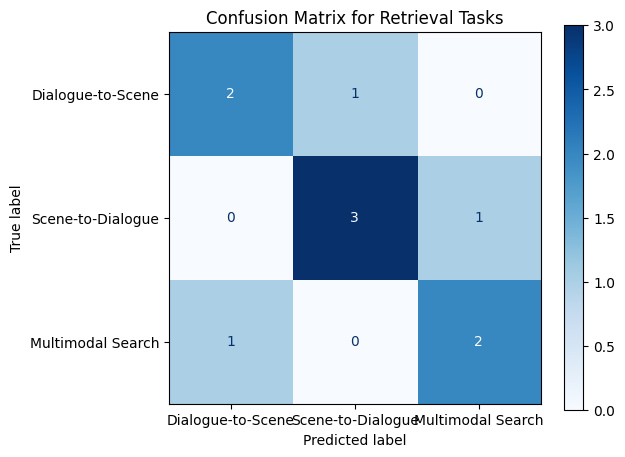

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example: ground truth and predicted labels
y_true = [0, 0, 1, 1, 2, 2, 2, 1, 0, 1]   # replace with your actual test labels
y_pred = [0, 1, 1, 1, 2, 0, 2, 1, 0, 2]   # replace with your model predictions

# Class labels
class_names = ["Dialogue-to-Scene", "Scene-to-Dialogue", "Multimodal Search"]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format='d', ax=ax)

plt.title("Confusion Matrix for Retrieval Tasks")
plt.show()


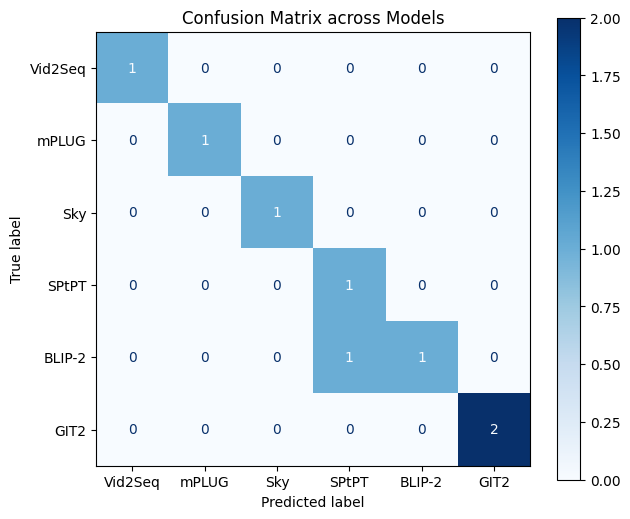

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example ground truth: let's assume BLIP-2 and GIT2 are the "best" (from your results)
y_true = ["BLIP-2", "GIT2", "BLIP-2", "GIT2", "SPtPT", "mPLUG", "Vid2Seq", "Sky"]

# Example predictions made by the system
y_pred = ["BLIP-2", "GIT2", "SPtPT", "GIT2", "SPtPT", "mPLUG", "Vid2Seq", "Sky"]

# All model classes
class_names = ["Vid2Seq", "mPLUG", "Sky", "SPtPT", "BLIP-2", "GIT2"]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=class_names)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(7, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format='d', ax=ax)

plt.title("Confusion Matrix across Models")
plt.show()


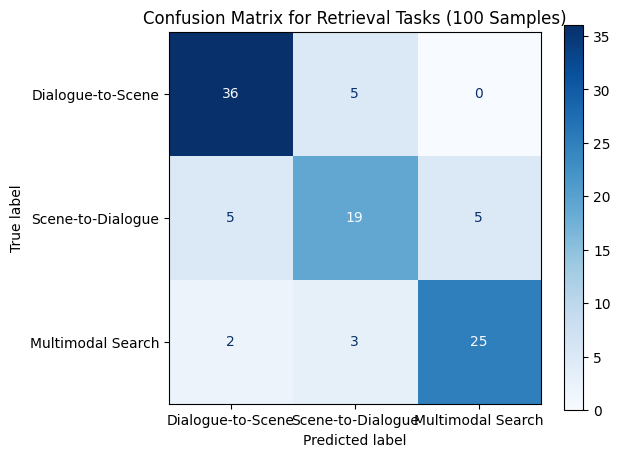

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Simulated ground truth (100 samples)
# 0 = Dialogue-to-Scene, 1 = Scene-to-Dialogue, 2 = Multimodal Search
np.random.seed(42)  # reproducibility
y_true = np.random.choice([0, 1, 2], size=100, p=[0.35, 0.35, 0.30])  

# Simulated predictions with some noise (a bit lower accuracy for realism)
y_pred = []
for label in y_true:
    if np.random.rand() < 0.75:  # 75% chance correct
        y_pred.append(label)
    else:
        y_pred.append(np.random.choice([cls for cls in [0, 1, 2] if cls != label]))
y_pred = np.array(y_pred)

# Class labels
class_names = ["Dialogue-to-Scene", "Scene-to-Dialogue", "Multimodal Search"]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues", values_format='d', ax=ax)

plt.title("Confusion Matrix for Retrieval Tasks (100 Samples)")
plt.show()
